In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing the Dataset - Under Sampling

In [10]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [11]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [12]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [13]:
df = fraud.append(non_fraud, ignore_index=True)

In [14]:
df.shape

(984, 31)

In [15]:
df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [16]:
X = df.drop('Class', axis=1)
y = df.Class

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [19]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
525,141755.0,-1.180919,0.161150,0.720448,0.462708,-0.968258,-0.302126,-0.329447,0.436241,-0.866893,...,-0.320309,0.028781,0.786888,-0.289126,0.039646,-0.259757,-0.232560,0.625412,0.093434,95.00
773,96970.0,1.970624,-0.301180,-1.088935,0.308871,0.033284,-0.278055,-0.220098,-0.121210,2.201097,...,-0.222288,-0.012226,0.402616,0.057508,0.757324,0.142483,0.098532,-0.067978,-0.068183,27.93
156,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76
310,93888.0,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1.00
21,8808.0,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83
747,135600.0,2.055148,0.153165,-1.790721,0.224661,0.680637,-0.370716,0.122409,-0.109877,0.149174,...,-0.092412,-0.324896,-0.829153,0.283185,0.204818,-0.224824,0.170303,-0.062182,-0.042286,0.89
274,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
964,125690.0,2.151588,-1.516765,-0.595142,-1.507411,-1.530023,-0.631699,-1.168409,-0.044157,-1.311695,...,-0.416413,-0.568927,-1.301859,0.533784,-0.093959,-0.720862,-0.684448,0.009693,-0.044243,49.57


In [20]:
scale = StandardScaler()

In [21]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [22]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Reshaping the Dataset for CNN

In [23]:
X_train.shape

(787, 30)

In [24]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Building the Model

In [26]:
epochs = 200
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [28]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 20ms/step - loss: 0.6918 - accuracy: 0.6747 - val_loss: 0.6232 - val_accuracy: 0.8731
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4377 - accuracy: 0.8107 - val_loss: 0.5745 - val_accuracy: 0.8832
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 0.3512 - accuracy: 0.8679 - val_loss: 0.5347 - val_accuracy: 0.9239
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.8640 - val_loss: 0.5052 - val_accuracy: 0.9492
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.3055 - accuracy: 0.8844 - val_loss: 0.4658 - val_accuracy: 0.9543
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8704 - val_loss: 0.4244 - val_accuracy: 0.9594
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8895 - val_loss: 0.3930 - val_accuracy: 0.9645
Epoch 8/200


25/25 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9441 - val_loss: 0.1066 - val_accuracy: 0.9645
Epoch 59/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9466 - val_loss: 0.1057 - val_accuracy: 0.9645
Epoch 60/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1349 - accuracy: 0.9530 - val_loss: 0.1030 - val_accuracy: 0.9645
Epoch 61/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1434 - accuracy: 0.9517 - val_loss: 0.1013 - val_accuracy: 0.9695
Epoch 62/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1676 - accuracy: 0.9301 - val_loss: 0.1017 - val_accuracy: 0.9695
Epoch 63/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9479 - val_loss: 0.1016 - val_accuracy: 0.9695
Epoch 64/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1493 - accuracy: 0.9454 - val_loss: 0.1034 - val_accuracy: 0.9695
Epoch 65/200
25/25 

Epoch 116/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1099 - accuracy: 0.9593 - val_loss: 0.0959 - val_accuracy: 0.9746
Epoch 117/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1054 - accuracy: 0.9593 - val_loss: 0.0962 - val_accuracy: 0.9746
Epoch 118/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1344 - accuracy: 0.9479 - val_loss: 0.0967 - val_accuracy: 0.9695
Epoch 119/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9504 - val_loss: 0.0958 - val_accuracy: 0.9695
Epoch 120/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1146 - accuracy: 0.9555 - val_loss: 0.0950 - val_accuracy: 0.9746
Epoch 121/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9682 - val_loss: 0.0944 - val_accuracy: 0.9746
Epoch 122/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1155 - accuracy: 0.9657 - val_loss: 0.0948 - val_accuracy: 0.9695

25/25 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9670 - val_loss: 0.1025 - val_accuracy: 0.9695
Epoch 174/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0894 - accuracy: 0.9644 - val_loss: 0.1033 - val_accuracy: 0.9695
Epoch 175/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1134 - accuracy: 0.9593 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 176/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.9682 - val_loss: 0.1034 - val_accuracy: 0.9695
Epoch 177/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0884 - accuracy: 0.9746 - val_loss: 0.1024 - val_accuracy: 0.9695
Epoch 178/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.9708 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 179/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0829 - accuracy: 0.9670 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 180/200

In [30]:
def plot_learning_curve(history,epoch):
    #Plot training and validation accuracy
    epoch_range = range(0,epoch)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()
    
    #Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()

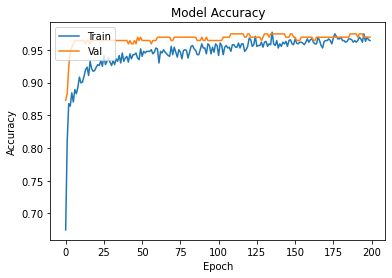

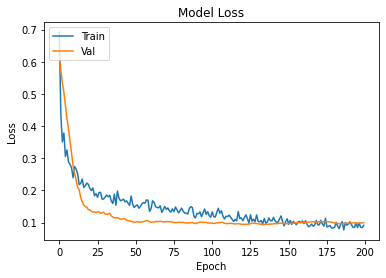

In [31]:
plot_learning_curve(history, epochs)

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[98,  1],
       [ 5, 93]], dtype=int64)

### Adding Max Pool

In [34]:
epochs = 200
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)            

In [36]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
25/25 [==============================] - 1s 27ms/step - loss: 1.1190 - accuracy: 0.5502 - val_loss: 0.6922 - val_accuracy: 0.4822
Epoch 2/200
25/25 [==============================] - 0s 6ms/step - loss: 0.9969 - accuracy: 0.6137 - val_loss: 0.6653 - val_accuracy: 0.6904
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7774 - accuracy: 0.6874 - val_loss: 0.6398 - val_accuracy: 0.7563
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7117 - accuracy: 0.7078 - val_loss: 0.6100 - val_accuracy: 0.7970
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.7459 - val_loss: 0.5776 - val_accuracy: 0.8173
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.7624 - val_loss: 0.5422 - val_accuracy: 0.8274
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.5462 - accuracy: 0.7738 - val_loss: 0.5095 - val_accuracy: 0.8274
Epoch 8/200


Epoch 59/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2647 - accuracy: 0.9098 - val_loss: 0.1617 - val_accuracy: 0.9594
Epoch 60/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.9085 - val_loss: 0.1615 - val_accuracy: 0.9594
Epoch 61/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.9199 - val_loss: 0.1643 - val_accuracy: 0.9594
Epoch 62/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.9085 - val_loss: 0.1619 - val_accuracy: 0.9594
Epoch 63/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.9022 - val_loss: 0.1580 - val_accuracy: 0.9594
Epoch 64/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.9009 - val_loss: 0.1585 - val_accuracy: 0.9594
Epoch 65/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2688 - accuracy: 0.9047 - val_loss: 0.1587 - val_accuracy: 0.9594
Epoch 

25/25 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.9199 - val_loss: 0.1311 - val_accuracy: 0.9645
Epoch 117/200
25/25 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9263 - val_loss: 0.1315 - val_accuracy: 0.9645
Epoch 118/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9238 - val_loss: 0.1304 - val_accuracy: 0.9645
Epoch 119/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.9250 - val_loss: 0.1281 - val_accuracy: 0.9645
Epoch 120/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1943 - accuracy: 0.9288 - val_loss: 0.1275 - val_accuracy: 0.9645
Epoch 121/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9276 - val_loss: 0.1270 - val_accuracy: 0.9645
Epoch 122/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2079 - accuracy: 0.9250 - val_loss: 0.1268 - val_accuracy: 0.9645
Epoch 123/200

25/25 [==============================] - 0s 6ms/step - loss: 0.2045 - accuracy: 0.9339 - val_loss: 0.1141 - val_accuracy: 0.9695
Epoch 174/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1865 - accuracy: 0.9416 - val_loss: 0.1135 - val_accuracy: 0.9695
Epoch 175/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1898 - accuracy: 0.9276 - val_loss: 0.1132 - val_accuracy: 0.9695
Epoch 176/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9365 - val_loss: 0.1128 - val_accuracy: 0.9695
Epoch 177/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9377 - val_loss: 0.1128 - val_accuracy: 0.9695
Epoch 178/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.9377 - val_loss: 0.1133 - val_accuracy: 0.9695
Epoch 179/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9301 - val_loss: 0.1125 - val_accuracy: 0.9695
Epoch 180/200

In [38]:
def plot_learning_curve(history,epoch):
    #Plot training and validation accuracy
    epoch_range = range(0,epoch)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()
    
    #Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()

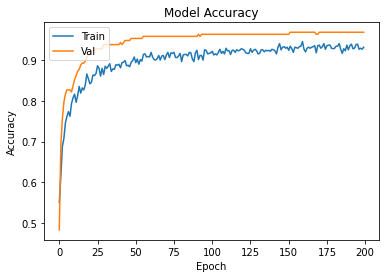

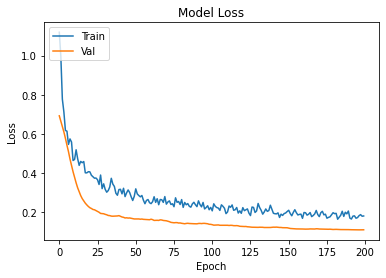

In [39]:
plot_learning_curve(history, epochs)

In [40]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[99,  0],
       [ 6, 92]], dtype=int64)